<u> <b> Pre-requisite: </b> </u> An overview of ns-3 and key components to be explained (as a ppt preferably)

# TTM4133- Introduction to Network Simulator (ns-3) and Simulation Execution Manager (SEM)
This lab serves as a beginner;s guide to getting started with ns-3. Moreover, we will consider a simple network communication use case to demonstrate the ability of the chosen simulator to visualize different communication scenarios.<br> 
**SEM** provides a helpful interface to run, collect, and, manage data from different ns-3 simulations. This example shows how you can use SEM to manage an ns-3 simulation. We will use a simple script available in scratch folder of 'ns-3' directory. This is where our ns-3 libraries and models reside. <br>
We will consider various parameters to study their impact in the considered cellular environment using provided script in ns-3. The learning objectives for this lab include:
- Introduction of ns3 and sem with a simple networked topology
- Understanding the simulation flow and different parameters from the topology
- Study the impact of variations in parameters on the flow key performance indicators (Throughput, Latency)
- Comparison of variations in the values of different parameters on flow statistics

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Introduction
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ns-3 provides an extensive to support different types of networks with its abstract and layered architecture. This lab serves as an introduction towards utilizing ns3 and sem tools together to explore the learning possibilities.

## 1.1 Network Toplogy in ns-3
The topology consists of two networks consisting of channel sense multiple access (CSMA) amongst a set of devices and a point-to-point (P2P) network  with a single node connected to the CSMA network. An application (with a UDP client) resides in **Node 0** communicating with another application (a UDP server) in **Node 4**. <br>
Several parameters can be tweaked in order to impact the perfromance of this communication application using the packet size (*udppksize*) and generation rate (*lambda*), delays for csma (*csmadelay*) and p2p (*p2pdelay*) links.
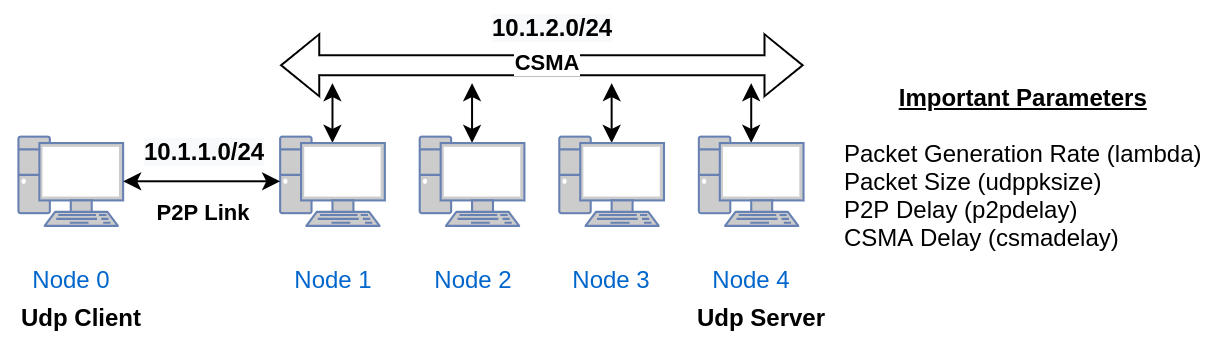

## 1.2 Run ns-3 simulations
This script is responsible for the initialization of the simulation design using SEM and the specification of different parameters for the considered network topology implemented in ns-3. The expected outcome is the generation of databases with collected results to be visualized later on. Following values of the parameters are utilized for this demonstration: <br>
- Packet generation rate = 500 packets\sec
- Packet size = 1024 bits
- P2P delay = 2ms
- CSMA delay = 5ms 

The parameters are passed to the simulation python script in the following format: <br>
**%run -i 'init.py' lambda udppksize p2pdelay csmadelay**

In [ ]:
%run -i 'init.py' 100 1024 2 5

## 1.3. Query and filter simulation results
The results from the sem simulation framework are queried and transferred to python for per-processing by defining a set of parameters and using the same simulation campaign that was utilized during the simulation process. This provides the necessary access to the results database for querying the relevant results.

In [ ]:

params = {
    'lambda': 100, #packets per second
    'udppksize': 1024, #packet size  
    'p2pdelay': 2,  #ms
    'csmadelay': 5, #ms  (40 fails)
}

result = campaign.db.get_complete_results(params=params)
print("There are %s results in the database\n" % len(list(result)))

In [ ]:
display(result)

We will utilize the results generated from the 'stdout' class of C++(which simply means that all console printed statements will be collected). Any other types of data can be generated and parsed for required results using python functions. We can observe from the previous field that <u>result</u> has 3 fields described as below: <br>
- **params** --> provides the set of parameters used during simulation
- **meta** --> used for identification of different runs in a simulation campaign
- **output** --> provides the required results from the ns-3 simulation

## 1.4 Data Pre-processing
Data processing and parsing is done to extract relevant information from the **output** field. This provides the script implementing different types of parsing and per-processing functions in order to prepare data for visualization and comparative analysis. In this demo example, we will be parsing the results for values of <u>Throughput</u> and <u>Latency</u> of different flows. We will perform multiple runs in order to validate the behavior of the simulation results statistically.

In [ ]:
%run -i 'data-pre.py'

In [ ]:
display(res)

## 1.5 Data Visualization
We now plot the obtained results for the throughput and latency for two different flows between **Node 0** and **Node 4**. These results will act as baseline for our further evaluations of the topology for subsequent tasks.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(40,10))
snsp1 = sns.lineplot(ax=axes[0], data=res, x='time', y='tput', hue= 'flow',ci=None)
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')

snsp2 = sns.lineplot(ax=axes[1], data=res, x='time', y='delay', hue= 'flow', ci=None)
snsp2.set( xlabel='Simulation Time (s)', ylabel='Latency (ms)')

snsp1 = sns.lineplot(ax=axes[0], data=res, x='time', y='tput', hue= 'flow', ci=None, legend=False)
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
# snsp1.legend(labels=["Node 0 -> Node 4","Node 4 -> Node 0"], title = "Flows")

snsp2 = sns.lineplot(ax=axes[1], data=res, x='time', y='delay', hue= 'flow', ci=None, legend=False)
snsp2.set( xlabel='Simulation Time (s)', ylabel='Latency (ms)')
# snsp2.legend(labels=["Node 0 -> Node 4","Node 4 -> Node 0"], title = "Flows")


## 2. Problem Statement
The topology provides a typical shared local area network (LAN) scenario, where, a point to point (P2P) link provides broadband access to a set of nodes connected through CSMA channel. CSMA is based on a carrier-sensing technique for access to the shared channel and transmission is only possible when there is no other transmission taking place. In case of transmission collisions, only one device is allowed to transmit while others wait for a chance to initiate the sensing process again. The maximum data rates for both P2P and CSMA channels are kept constant while packet generation rate (lambda), packet size (udppksize), and delay for P2P and CSMA channels (p2pdelay, csmadelay) are altered to analyze the performance of the given topology. We will try to observe different events during the simulation process and any possible bounds for combination of different parameters in the topology along with the throughput and latency bounds.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#1. Identify the bottleneck link in the current topology (P2P or CSMA) for varying packet arrival rates
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The task covers different combinations of parameters to measure the performance of throughput and latency for the communications established between **Node 0** and **Node 4**. Utilize the following parameters to produce simulation results:
- lambda = 1000, udppksize = 1024, p2pdelay = 2, csmadelay = 10
- lambda = 5000, udppksize = 1024, p2pdelay = 2, csmadelay = 10
- lambda = 10000, udppksize = 1024, p2pdelay = 2, csmadelay = 10

 ## lambda = 1000, udppksize = 1024, p2pdelay = 2, csmadelay = 10

 ## lambda = 5000, udppksize = 1024, p2pdelay = 2, csmadelay = 10

 ## lambda = 10000, udppksize = 1024, p2pdelay = 2, csmadelay = 10

## Q1. Which type of network is the likely candidate for congestion (CSMA or P2P) ? What is the maximum value of packet generation rate that can be supported by this topology?

## Q2. Explain the difference in behavior of throughput and latency for different flows? Is the network congested in any of the parameter sets?

## Q3. What could the possible way to avoid this congestion in the network? Which of the links is the likely contributor to this congestion?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#2. Observe the impact of varying packet size for the UDP Application
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The task covers different combinations of parameters to measure the performance of throughput and latency for the communications established between **Node 0** and **Node 4**. Utilize the following parameters to produce simulation results:
- lambda = 500, udppksize = 1024, p2pdelay = 2, csmadelay = 10
- lambda = 500, udppksize = 2048, p2pdelay = 2, csmadelay = 10
- lambda = 500, udppksize = 3096, p2pdelay = 2, csmadelay = 10

 ## lambda = 500, udppksize = 1024, p2pdelay = 2, csmadelay = 10

 ## lambda = 500, udppksize = 2048, p2pdelay = 2, csmadelay = 10

 ## lambda = 500, udppksize = 3096, p2pdelay = 2, csmadelay = 10

## Q1. It is observed that the packet size decreases the overall throughput observed. Can you explain the behavior considering the results from previous task as well? Is it related to congestion or bottleneck links?

## Q2. A relationship between packet sizes and flow latency is also visible. Is it justified with the findings of the throughput? Explain the decrease in latency and explain the relationship keeping in view that all other values are kept constant in the simulation?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#3. Observe the impact of varying link delays for P2P and CSMA channels.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The task covers different combinations of parameters to measure the performance of throughput and latency for the communications established between **Node 0** and **Node 4**. Utilize the following parameters to produce simulation results:
- lambda = 600, udppksize = 1024, p2pdelay = 5, csmadelay = 10
- lambda = 600, udppksize = 1024, p2pdelay = 10, csmadelay = 10
- lambda = 600, udppksize = 1024, p2pdelay = 5, csmadelay = 10
- lambda = 600, udppksize = 1024, p2pdelay = 5, csmadelay = 20

 ## lambda = 600, udppksize = 1024, p2pdelay = 5, csmadelay = 10

 ## lambda = 600, udppksize = 1024, p2pdelay = 10, csmadelay = 10

 ## lambda = 600, udppksize = 1024, p2pdelay = 5, csmadelay = 10

 ## lambda = 600, udppksize = 1024, p2pdelay = 5, csmadelay = 20

## Q1. What is the impact of increasing p2p delay on the throughput and latency of the flows between Node 0 and 4? 

## Q2. What is the impact of increasing csma delay on the throughput and latency of the flows between Node 0 and 4? 

## Q3. Which link is acting as a bigger bottleneck? (CSMA or P2P) Can you provide any reasoning for the observed behavior?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------